In [1]:
import tweepy
import re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import time
from tweepy import TooManyRequests

In [2]:
# Replace these with your own Twitter API keys
api_key = 'HvP4wSeUi0gw8hZgwz5ukHy4S'
api_secret_key = 'H22uMacDwCxYHSJxf3VHwE2rkZZ9Jl8v2o45JZPHtcG1AMeAeY'
access_token = '1861628113165373440-oELBBy8bLrSVcf2oiwnawwxXUYh6pH'
access_token_secret = 'bZHXq60AeJGBlDAPugcDzAdeV2aPD3B2Xhr7ZruDCgcHh'


In [3]:
# Authenticate to Twitter
auth = tweepy.OAuth1UserHandler(api_key, api_secret_key, access_token, access_token_secret)
api = tweepy.Client(auth)

In [4]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAALDQxAEAAAAAS4c2COCe5eRLYN%2F7kb9TN6dC%2BGI%3DTFd9zolzNnY4g5Nl7u9td9EQZ6xy1AUgfARLJ6vROETrpY5QRd"
client = tweepy.Client(bearer_token=bearer_token)

In [5]:
# Fetch tweets containing a specific keyword
query = "Python programming"
tweets = client.search_recent_tweets(query, max_results=100, tweet_fields=['lang', 'text'])

In [6]:
# Preprocess tweets
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet_tokens = tweet.split()
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    return " ".join(filtered_words)

# Preprocess tweets
preprocessed_tweets = [preprocess_tweet(tweet.text) for tweet in tweets.data if tweet.text]

In [9]:
# Perform sentiment analysis
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

sentiments = [get_sentiment(tweet) for tweet in preprocessed_tweets]


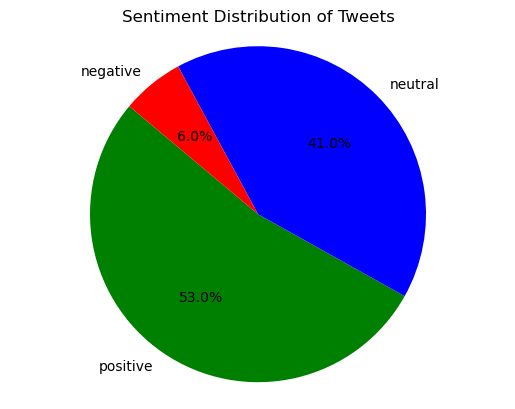

In [10]:
# Visualize sentiment distribution
sentiment_counts = {
    "positive": sentiments.count("positive"),
    "neutral": sentiments.count("neutral"),
    "negative": sentiments.count("negative")
}

labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets")
plt.show()